In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import pickle


In [6]:
dataset = load_breast_cancer()

In [7]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
##Create Dataframe 
d1 = pd.DataFrame(dataset.data,columns=dataset.feature_names)
d2 = pd.DataFrame(dataset.target,columns=['target'])
df = pd.concat([d1,d2],axis=1)

In [9]:
##Read Dataset
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [13]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [14]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [16]:
##dependent and independent
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [17]:
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [18]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [19]:
##train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [22]:
def correlation(dataset,threshold):
    corr_col = set()
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                corr_name = corr_matrix.columns[i]
                corr_col.add(corr_name)
    return corr_col

In [24]:
corr_name = correlation(x_train,0.88)

In [25]:
corr_name

{'area error',
 'mean area',
 'mean concave points',
 'mean perimeter',
 'perimeter error',
 'worst area',
 'worst concave points',
 'worst concavity',
 'worst perimeter',
 'worst radius',
 'worst texture'}

In [26]:
x_train.drop(corr_name,axis=1,inplace=True)
x_test.drop(corr_name,axis=1,inplace=True)

In [27]:
x_train

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst symmetry,worst fractal dimension
172,15.460,11.89,0.12570,0.15550,0.20320,0.1966,0.07069,0.4209,0.6583,0.005393,0.023210,0.043030,0.013200,0.01792,0.004168,0.15310,0.35830,0.3216,0.10100
407,12.850,21.37,0.07551,0.08316,0.06126,0.1580,0.06114,0.4993,1.7980,0.006011,0.044800,0.051750,0.013410,0.02669,0.007731,0.09402,0.19360,0.2488,0.08151
56,19.210,18.57,0.10530,0.12670,0.13230,0.1917,0.05961,0.7275,1.1930,0.006458,0.023060,0.029450,0.015380,0.01852,0.002608,0.16240,0.35110,0.3537,0.08294
497,12.470,17.31,0.08928,0.07630,0.03609,0.1526,0.06046,0.1532,0.7810,0.003796,0.013710,0.013460,0.007096,0.01536,0.001541,0.12760,0.25060,0.3035,0.07661
301,12.460,19.89,0.08451,0.10140,0.06830,0.1781,0.06249,0.3642,1.0400,0.006530,0.033690,0.047120,0.014030,0.02740,0.004651,0.10500,0.21580,0.2685,0.07764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,0.09783,0.15310,0.08606,0.1902,0.08980,0.5262,0.8522,0.017210,0.093680,0.056710,0.017660,0.02541,0.021930,0.12070,0.24360,0.2254,0.10840
106,11.640,18.33,0.11420,0.10170,0.07070,0.1801,0.06520,0.3060,1.6570,0.008540,0.023100,0.029450,0.013980,0.01565,0.003840,0.16880,0.26600,0.2806,0.09097
270,14.290,16.82,0.06429,0.02675,0.00725,0.1508,0.05376,0.1302,0.7198,0.003492,0.003710,0.004826,0.003608,0.01536,0.001381,0.08567,0.05036,0.2458,0.06120
435,13.980,19.62,0.10600,0.11330,0.11260,0.1669,0.06544,0.2208,0.9533,0.005314,0.017910,0.021850,0.009567,0.01223,0.002846,0.16130,0.35680,0.3179,0.10550


In [28]:
##pre puning
parameter = {
    'criterion':('gini','entropy','log_loss'),
    'splitter':('best','random'),
    'max_depth':[2,3,4,5],
    'min_samples_split':[2,3,4,5,6],
    'min_samples_leaf':[1,2,3],
    'max_features':('auto','sqrt','log2')
}

In [29]:
obj = GridSearchCV(DecisionTreeClassifier(),param_grid=parameter,cv=10)

In [30]:
obj.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'splitter': ('best', 'random')})

In [32]:
obj.best_params_

{'criterion': 'log_loss',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [33]:
treeClassifier = DecisionTreeClassifier(criterion='log_loss',max_depth=3,max_features='log2',min_samples_leaf=3,min_samples_split=2,splitter='best')

In [34]:
treeClassifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=3, max_features='log2',
                       min_samples_leaf=3)

[Text(0.5, 0.875, 'x[16] <= 0.266\nlog_loss = 0.958\nsamples = 381\nvalue = [145, 236]'),
 Text(0.25, 0.625, 'x[0] <= 14.59\nlog_loss = 0.666\nsamples = 242\nvalue = [42, 200]'),
 Text(0.125, 0.375, 'x[4] <= 0.027\nlog_loss = 0.175\nsamples = 191\nvalue = [5, 186]'),
 Text(0.0625, 0.125, 'log_loss = 0.0\nsamples = 85\nvalue = [0, 85]'),
 Text(0.1875, 0.125, 'log_loss = 0.274\nsamples = 106\nvalue = [5, 101]'),
 Text(0.375, 0.375, 'x[4] <= 0.072\nlog_loss = 0.848\nsamples = 51\nvalue = [37, 14]'),
 Text(0.3125, 0.125, 'log_loss = 0.696\nsamples = 16\nvalue = [3, 13]'),
 Text(0.4375, 0.125, 'log_loss = 0.187\nsamples = 35\nvalue = [34, 1]'),
 Text(0.75, 0.625, 'x[7] <= 0.468\nlog_loss = 0.825\nsamples = 139\nvalue = [103, 36]'),
 Text(0.625, 0.375, 'x[0] <= 15.11\nlog_loss = 0.977\nsamples = 85\nvalue = [50, 35]'),
 Text(0.5625, 0.125, 'log_loss = 0.987\nsamples = 60\nvalue = [26, 34]'),
 Text(0.6875, 0.125, 'log_loss = 0.242\nsamples = 25\nvalue = [24, 1]'),
 Text(0.875, 0.375, 'x[14] <

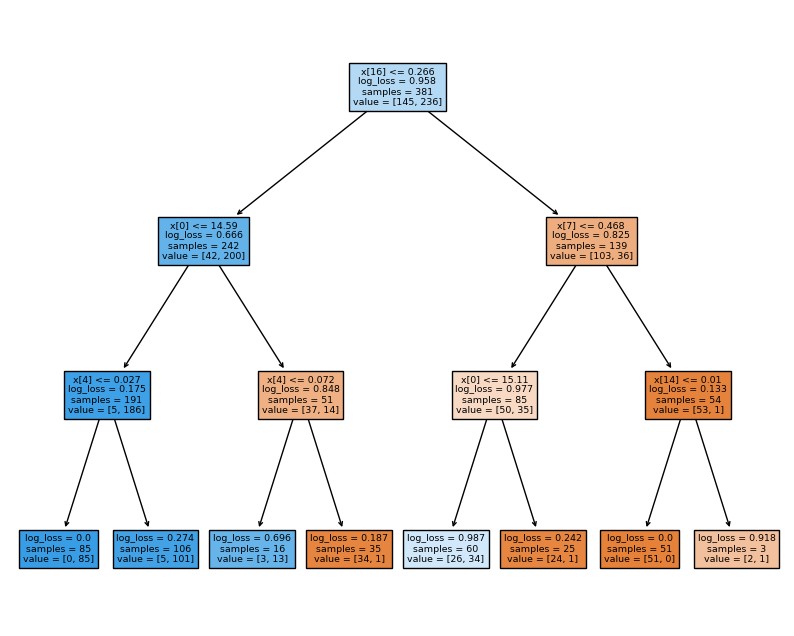

In [35]:
plt.figure(figsize=(10,8))
tree.plot_tree(treeClassifier,filled=True)

In [36]:
y_pred = treeClassifier.predict(x_test)

In [37]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [38]:
y_test

204    1
70     0
131    0
431    1
540    1
      ..
141    0
498    0
7      0
541    1
19     1
Name: target, Length: 188, dtype: int64

In [39]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9095744680851063
[[ 53  14]
 [  3 118]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86        67
           1       0.89      0.98      0.93       121

    accuracy                           0.91       188
   macro avg       0.92      0.88      0.90       188
weighted avg       0.91      0.91      0.91       188



In [40]:
pickle.dump(treeClassifier,open('obj_decision_tree.pkl','wb'))

In [42]:
obj = pickle.load(open('obj_decision_tree.pkl','rb'))

In [43]:
x_train.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst symmetry,worst fractal dimension
172,15.46,11.89,0.12570,0.15550,0.20320,0.1966,0.07069,0.4209,0.6583,0.005393,0.02321,0.04303,0.013200,0.01792,0.004168,0.15310,0.3583,0.3216,0.10100
407,12.85,21.37,0.07551,0.08316,0.06126,0.1580,0.06114,0.4993,1.7980,0.006011,0.04480,0.05175,0.013410,0.02669,0.007731,0.09402,0.1936,0.2488,0.08151
56,19.21,18.57,0.10530,0.12670,0.13230,0.1917,0.05961,0.7275,1.1930,0.006458,0.02306,0.02945,0.015380,0.01852,0.002608,0.16240,0.3511,0.3537,0.08294
497,12.47,17.31,0.08928,0.07630,0.03609,0.1526,0.06046,0.1532,0.7810,0.003796,0.01371,0.01346,0.007096,0.01536,0.001541,0.12760,0.2506,0.3035,0.07661
301,12.46,19.89,0.08451,0.10140,0.06830,0.1781,0.06249,0.3642,1.0400,0.006530,0.03369,0.04712,0.014030,0.02740,0.004651,0.10500,0.2158,0.2685,0.07764


In [ ]:
"